# Customizing Plot Legends

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

C:\Users\JCA\AppData\Local\Temp\ipykernel_28696\4184164334.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


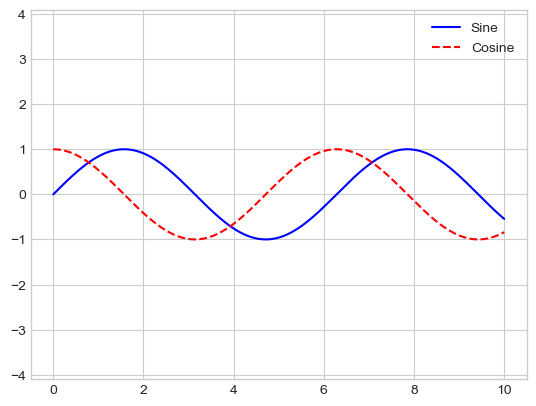

In [2]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend()

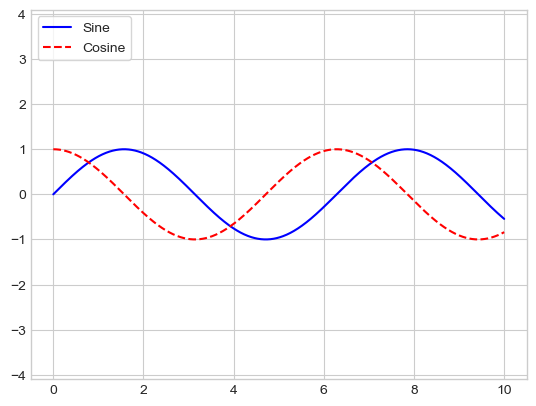

In [3]:
ax.legend(loc='upper left', frameon=True)
fig

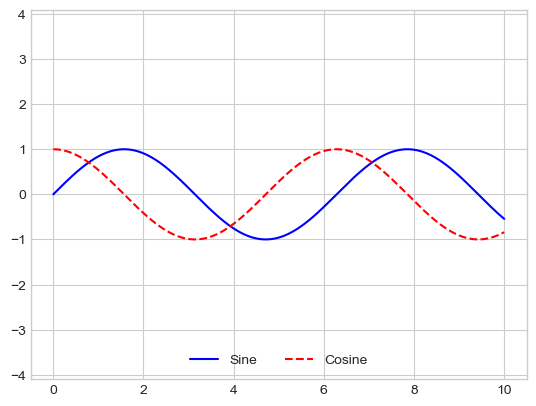

In [4]:
ax.legend(loc='lower center', ncol=2)
fig

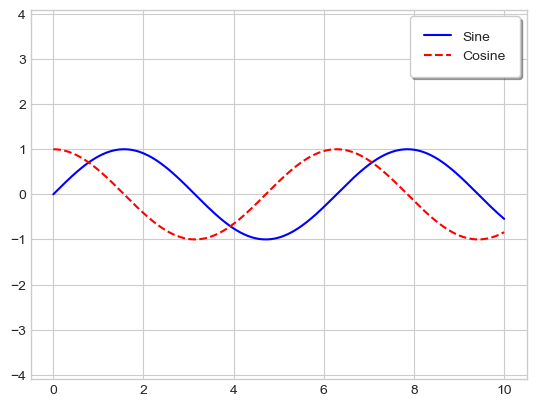

In [5]:
ax.legend(frameon=True, fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

# A. Choosing Elements for the Legend



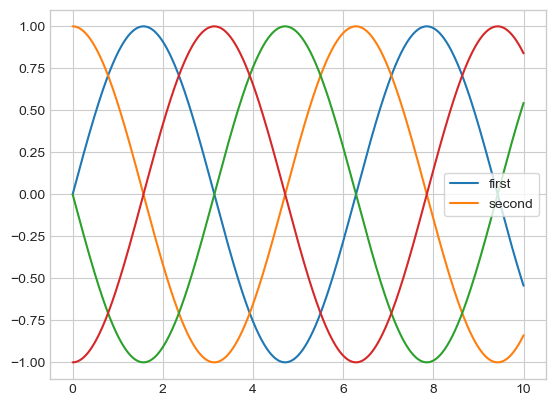

In [6]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second'], frameon=True);

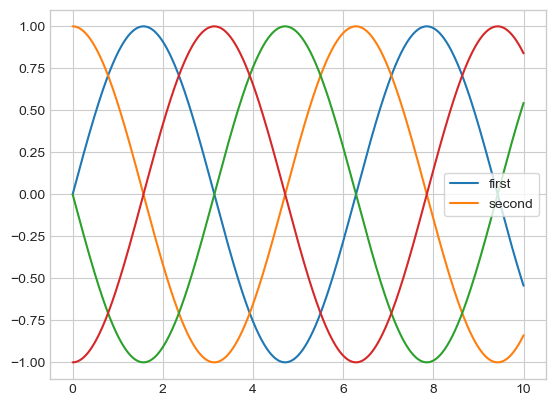

In [7]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(frameon=True);

# B. Legend for Size Points:



In [8]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks_v1/data/california_cities.csv'
cities = pd.read_csv(url)

In [9]:
cities.columns

Index(['Unnamed: 0', 'city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent'],
      dtype='object')

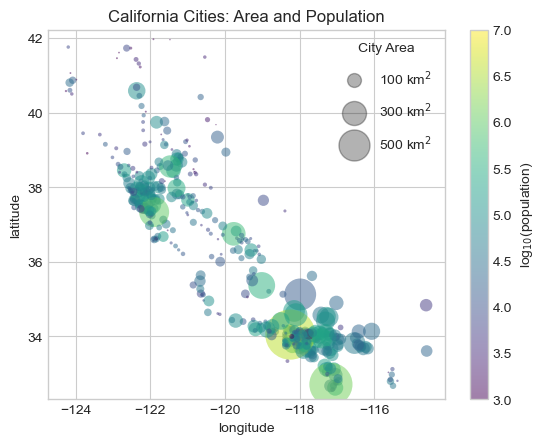

In [12]:
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

plt.scatter(lon, lat, label=None,
            c = np.log10(population),
            cmap='viridis',
            s=area, linewidth = 0, alpha=0.5)

plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + ' km$^2$')
    
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
plt.title('California Cities: Area and Population');

# C. Multiple Legends:

* Sometimes when designing a plot you’d like to add multiple legends to the same axes.
    * Unfortunately, Matplotlib does not make this easy: via the standard `legend` interface, it is only possible to create a single legend for the entire plot. 
    * If you try to create a second legend using `plt.legend` or `ax.legend`, it will simply override the first one.

    * We can work around this by creating a new legend artist from scratch:
        *  `Artist` is the base class Matplotlib uses for visual attributes, and then using the lower-level `ax.add_artist` method to manually add the second artist to the plot

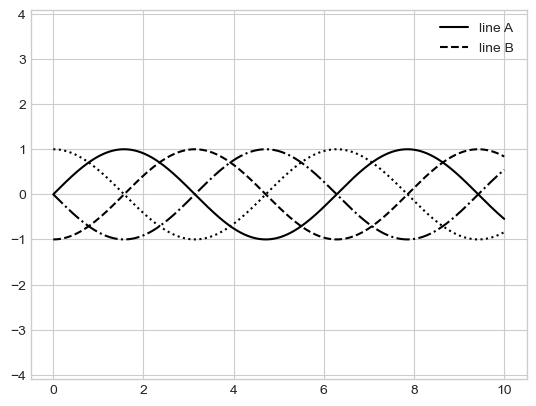

In [16]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')
ax.axis('equal')

# Specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right')


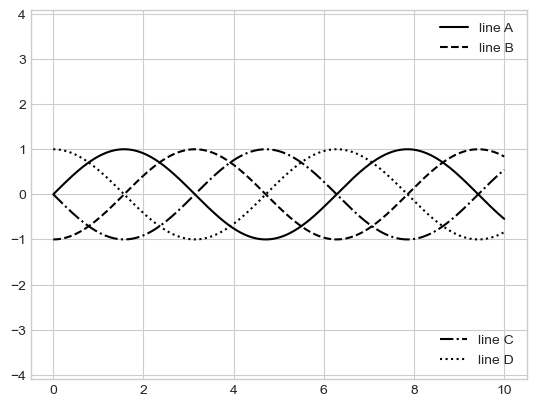

In [17]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')
ax.axis('equal')

# Specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right')

# Create the second legend and add the artist manually
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'], loc='lower right')
ax.add_artist(leg);